In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file into a DataFrame
csv_file = 'evaluation_results_dynamic_prompt.csv'
df = pd.read_csv(csv_file)

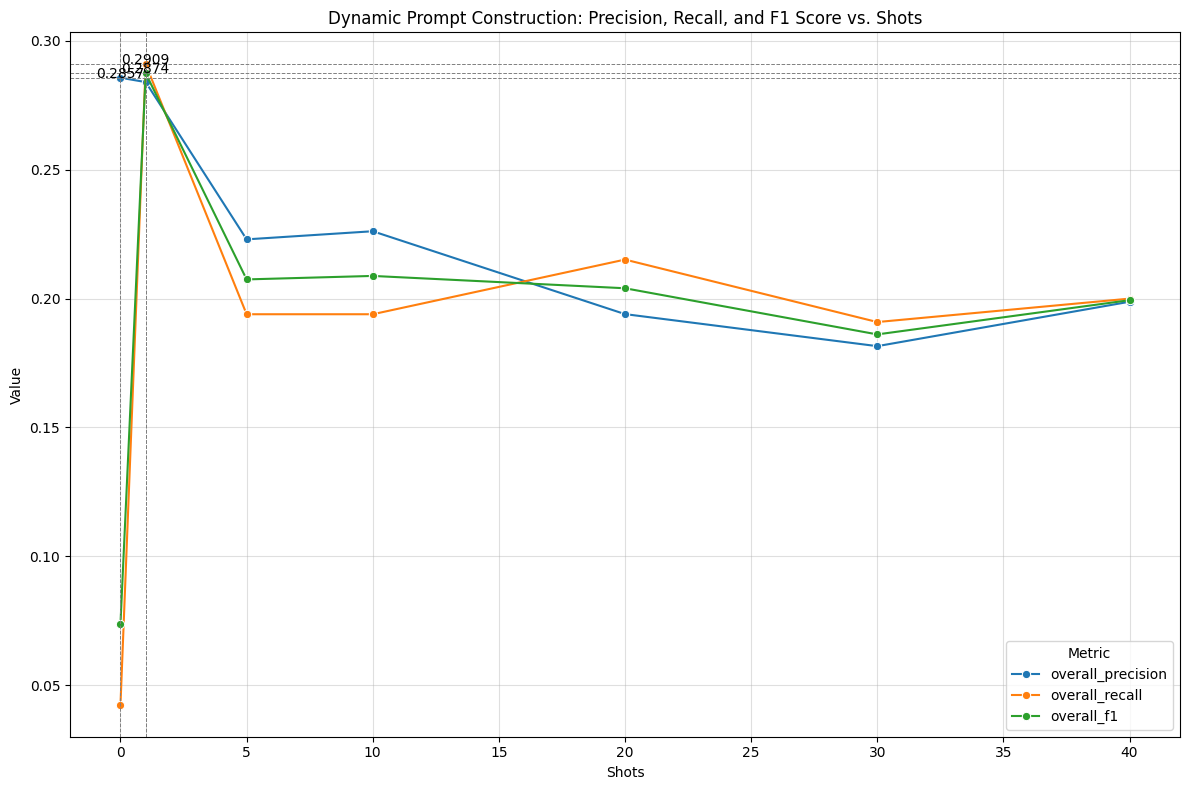

In [3]:
# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = df.melt(id_vars='shots', value_vars=['overall_precision', 'overall_recall', 'overall_f1'],
                    var_name='Metric', value_name='Value')

# Plot precision, recall, and F1 score on the same graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='shots', y='Value', hue='Metric', data=df_melted, marker='o')
plt.title('Dynamic Prompt Construction: Precision, Recall, and F1 Score vs. Shots')
plt.xlabel('Shots')
plt.ylabel('Value')
plt.legend(title='Metric')

# Annotate the highest values and add lines
for metric in ['overall_precision', 'overall_recall', 'overall_f1']:
    max_value = df[metric].max()
    max_shots = df.loc[df[metric].idxmax(), 'shots']
    plt.annotate(f'{max_value:.4f}', xy=(max_shots, max_value), xytext=(max_shots, max_value + 0.00),
                                  horizontalalignment='center', fontsize=10, color='black')
    plt.axhline(y=max_value, color='gray', linestyle='--', linewidth=0.7)
    plt.axvline(x=max_shots, color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.grid(True, alpha=0.4)
plt.show()

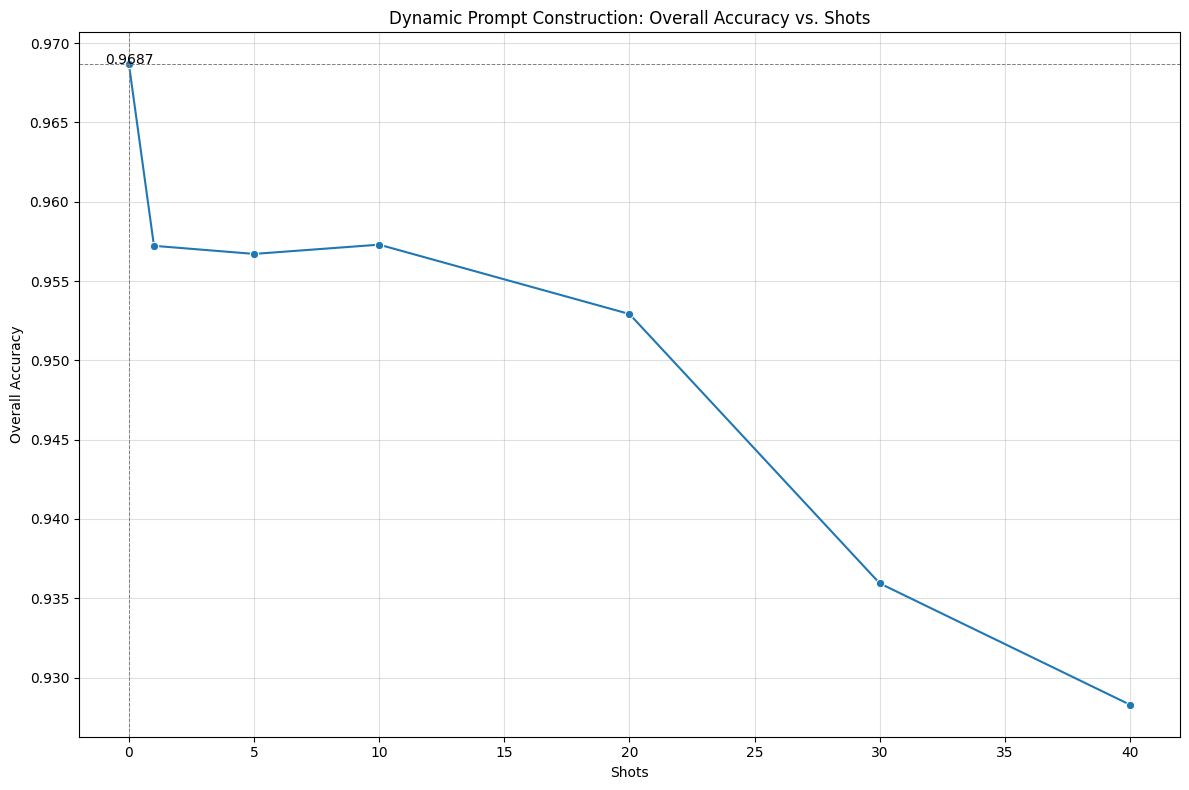

In [ ]:

# Plot overall accuracy
plt.figure(figsize=(12, 8))
sns.lineplot(x='shots', y='overall_accuracy', data=df, marker='o')
plt.title('Dynamic Prompt Construction: Overall Accuracy vs. Shots')
plt.xlabel('Shots')
plt.ylabel('Overall Accuracy')

# Annotate the highest value and add lines
max_accuracy = df['overall_accuracy'].max()
max_shots_accuracy = df.loc[df['overall_accuracy'].idxmax(), 'shots']
plt.annotate(f'{max_accuracy:.4f}', xy=(max_shots_accuracy, max_accuracy), xytext=(max_shots_accuracy, max_accuracy + 0.000),
             horizontalalignment='center', fontsize=10, color='black')
plt.axhline(y=max_accuracy, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(x=max_shots_accuracy, color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.grid(True, alpha=0.4)
plt.show()

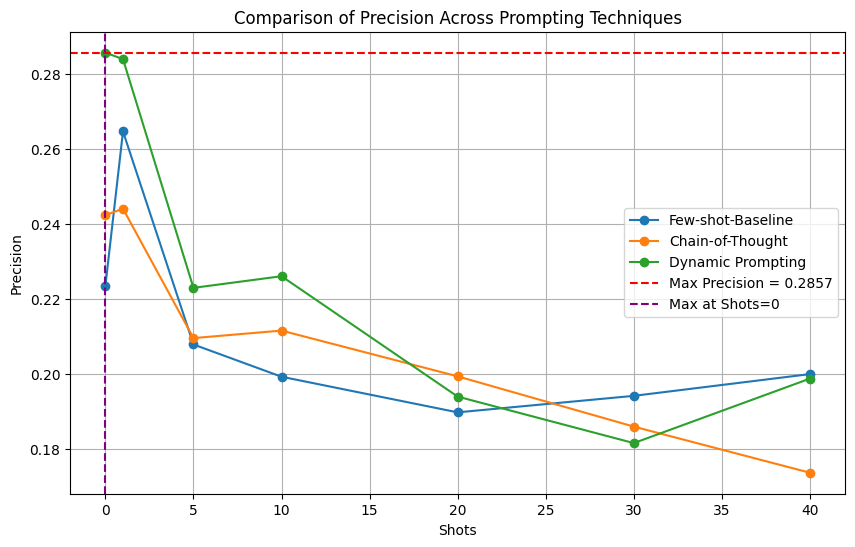

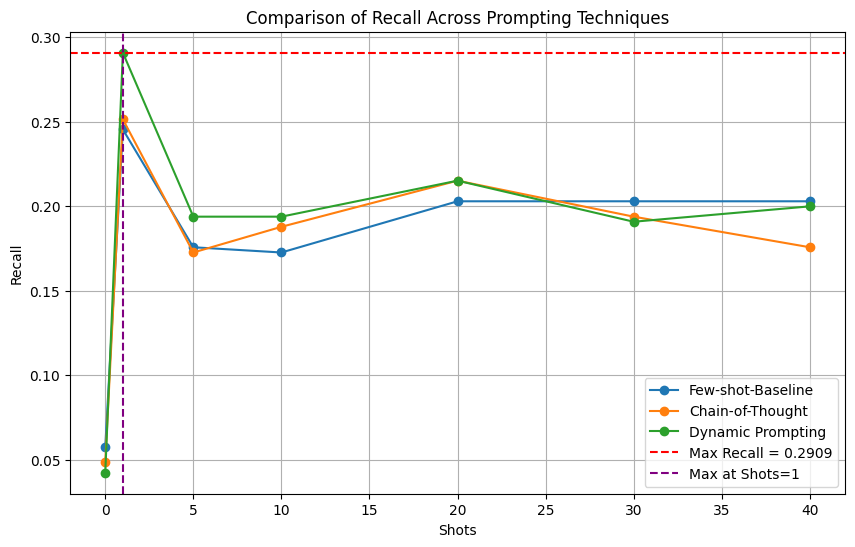

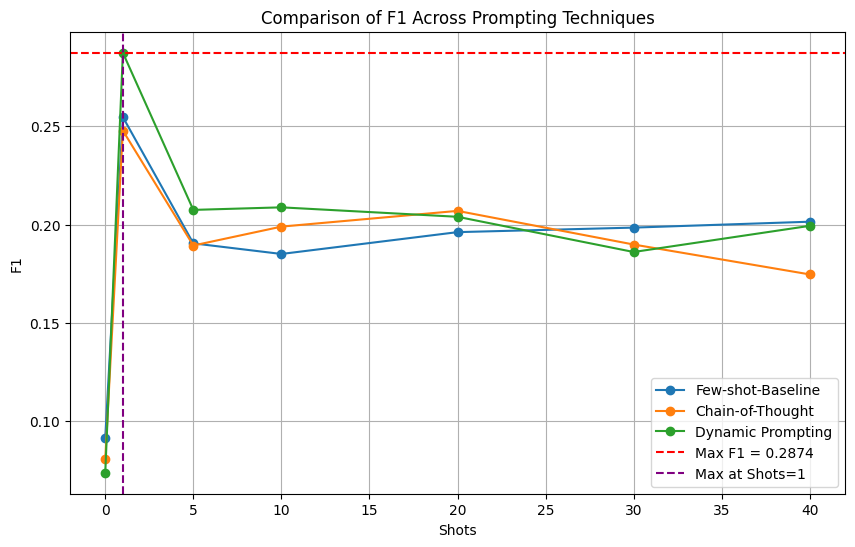

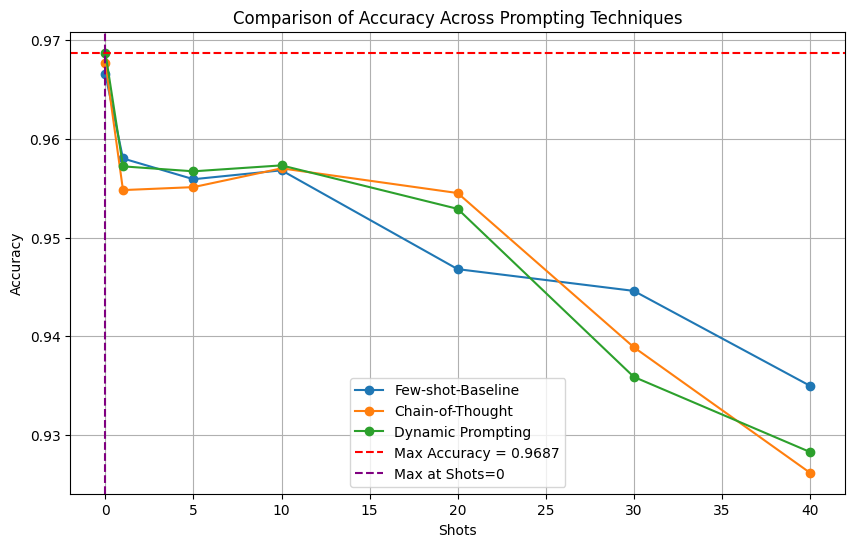

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Few-shot
few_shot_data = {
    'Shots': [0, 1, 5, 10, 20, 30, 40],
    'Precision': [0.2235, 0.2647, 0.2079, 0.1993, 0.1898, 0.1942, 0.2000],
    'Recall': [0.0576, 0.2455, 0.1758, 0.1727, 0.2030, 0.2030, 0.2030],
    'F1': [0.0916, 0.2547, 0.1905, 0.1851, 0.1962, 0.1985, 0.2015],
    'Accuracy': [0.9665, 0.9580, 0.9559, 0.9568, 0.9468, 0.9446, 0.9350]
}

# Data for Chain-of-Thought
chain_of_thought_data = {
    'Shots': [0, 1, 5, 10, 20, 30, 40],
    'Precision': [0.2424, 0.2441, 0.2096, 0.2116, 0.1994, 0.1860, 0.1737],
    'Recall': [0.0485, 0.2515, 0.1727, 0.1879, 0.2152, 0.1939, 0.1758],
    'F1': [0.0808, 0.2478, 0.1894, 0.1990, 0.2070, 0.1899, 0.1747],
    'Accuracy': [0.9677, 0.9548, 0.9551, 0.9570, 0.9545, 0.9389, 0.9262]
}

# Data for Dynamic Prompting
dynamic_prompt_data = {
    'Shots': [0, 1, 5, 10, 20, 30, 40],
    'Precision': [0.2857, 0.2840, 0.2230, 0.2261, 0.1940, 0.1816, 0.1988],
    'Recall': [0.0424, 0.2909, 0.1939, 0.1939, 0.2152, 0.1909, 0.2000],
    'F1': [0.0739, 0.2874, 0.2075, 0.2088, 0.2040, 0.1861, 0.1994],
    'Accuracy': [0.9687, 0.9572, 0.9567, 0.9573, 0.9529, 0.9359, 0.9283]
}

# Function to plot metrics with annotations for maximum values
def plot_metrics_with_highlight(metric_name, few_shot_df, chain_of_thought_df, dynamic_prompt_df):
    plt.figure(figsize=(10, 6))

    # Plotting data
    plt.plot(few_shot_df['Shots'], few_shot_df[metric_name], label='Few-shot-Baseline', marker='o')
    plt.plot(chain_of_thought_df['Shots'], chain_of_thought_df[metric_name], label='Chain-of-Thought', marker='o')
    plt.plot(dynamic_prompt_df['Shots'], dynamic_prompt_df[metric_name], label='Dynamic Prompting', marker='o')

    # Find maximum value and corresponding shot count
    max_value = max(
        max(few_shot_df[metric_name]),
        max(chain_of_thought_df[metric_name]),
        max(dynamic_prompt_df[metric_name])
    )
    max_shot_few_shot = few_shot_df.loc[few_shot_df[metric_name].idxmax(), 'Shots']
    max_shot_chain_of_thought = chain_of_thought_df.loc[chain_of_thought_df[metric_name].idxmax(), 'Shots']
    max_shot_dynamic_prompt = dynamic_prompt_df.loc[dynamic_prompt_df[metric_name].idxmax(), 'Shots']

    # Adding horizontal and vertical lines for the maximum value
    plt.axhline(max_value, color='red', linestyle='--', label=f'Max {metric_name} = {max_value:.4f}')
    if max_value == max(few_shot_df[metric_name]):
        plt.axvline(max_shot_few_shot, color='blue', linestyle='--', label=f'Max at Shots={max_shot_few_shot}')
    elif max_value == max(chain_of_thought_df[metric_name]):
        plt.axvline(max_shot_chain_of_thought, color='green', linestyle='--', label=f'Max at Shots={max_shot_chain_of_thought}')
    elif max_value == max(dynamic_prompt_df[metric_name]):
        plt.axvline(max_shot_dynamic_prompt, color='purple', linestyle='--', label=f'Max at Shots={max_shot_dynamic_prompt}')

    # Add labels and title
    plt.title(f'Comparison of {metric_name} Across Prompting Techniques')
    plt.xlabel('Shots')
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate plots with highlights for Precision, Recall, F1, and Accuracy
for metric in ['Precision', 'Recall', 'F1', 'Accuracy']:
    plot_metrics_with_highlight(metric, few_shot_df, chain_of_thought_df, dynamic_prompt_df)
